In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
# Set ipython's max row display
pd.set_option('display.max_row', 2000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [2]:
air_visit = pd.read_csv('air_visit_data.csv')
#air_visit.index = pd.to_datetime(air_visit['visit_date'])
#air_visit = air_visit.groupby('air_store_id').apply(lambda g: g['visitors'].resample('1d').sum()).reset_index()
#air_visit['visit_date'] = air_visit['visit_date'].dt.strftime('%Y-%m-%d')
#air_visit['was_nil'] = air_visit['visitors'].isnull()
#air_visit['visitors'].fillna(0, inplace=True)

air_visit.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [3]:
date_info = pd.read_csv('date_info.csv')
date_info.rename(columns={'holiday_flg': 'is_holiday', 'calendar_date': 'visit_date'}, inplace=True) #更改columns名
#增加前後一日是否為節日的columns
date_info['prev_day_is_holiday'] = date_info['is_holiday'].shift().fillna(0)
date_info['next_day_is_holiday'] = date_info['is_holiday'].shift(-1).fillna(0)

date_info.head()

,visit_date,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday
0,2016-01-01,Friday,1,0.0,1.0
1,2016-01-02,Saturday,1,1.0,1.0
2,2016-01-03,Sunday,1,1.0,0.0
3,2016-01-04,Monday,0,1.0,0.0
4,2016-01-05,Tuesday,0,0.0,0.0


In [4]:
air_store_info = pd.read_csv('air_store_info_with_nearest_active_station.csv')
#比官方資料增加與最鄰近車站的側地距離與大圓路徑距離
to_drop = ['station_latitude', 'station_longitude', 'latitude_str', 'longitude_str', 'station_great_circle']
air_store_info = air_store_info.drop(to_drop, axis='columns')
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,station_id,station_vincenty
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hyogo__kobe-kana__koube,1.277232
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hyogo__kobe-kana__koube,1.277232
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hyogo__kobe-kana__koube,1.277232
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hyogo__kobe-kana__koube,1.277232
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,tokyo__tokyo-kana__tonokyo,3.730672


In [5]:
import numpy as np

submission = pd.read_csv('sample_submission.csv')
submission['air_store_id'] = submission['id'].str.slice(0, 20)
submission['visit_date'] = submission['id'].str.slice(21)
submission['is_test'] = True
submission['visitors'] = np.nan
submission['test_number'] = range(len(submission))

submission.head()

,id,visitors,air_store_id,visit_date,is_test,test_number
0,air_00a91d42b08b08d9_2017-04-23,NaN,air_00a91d42b08b08d9,2017-04-23,True,0
1,air_00a91d42b08b08d9_2017-04-24,NaN,air_00a91d42b08b08d9,2017-04-24,True,1
2,air_00a91d42b08b08d9_2017-04-25,NaN,air_00a91d42b08b08d9,2017-04-25,True,2
3,air_00a91d42b08b08d9_2017-04-26,NaN,air_00a91d42b08b08d9,2017-04-26,True,3
4,air_00a91d42b08b08d9_2017-04-27,NaN,air_00a91d42b08b08d9,2017-04-27,True,4


In [6]:
data = pd.concat((air_visit, submission.drop('id', axis='columns')))
data['is_test'].fillna(False, inplace=True)
data = pd.merge(left=data, right=date_info, on='visit_date', how='left')
data = pd.merge(left=data, right=air_store_info, on='air_store_id', how='left')
data['visitors'] = data['visitors'].astype(float)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,air_store_id,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,station_id,station_vincenty
0,air_ba937bf13d40fb24,False,NaN,2016-01-13,25.0,Wednesday,0,0.0,0.0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,tokyo__tokyo-kana__tonokyo,3.730672
1,air_ba937bf13d40fb24,False,NaN,2016-01-14,32.0,Thursday,0,0.0,0.0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,tokyo__tokyo-kana__tonokyo,3.730672
2,air_ba937bf13d40fb24,False,NaN,2016-01-15,29.0,Friday,0,0.0,0.0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,tokyo__tokyo-kana__tonokyo,3.730672
3,air_ba937bf13d40fb24,False,NaN,2016-01-16,22.0,Saturday,0,0.0,0.0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,tokyo__tokyo-kana__tonokyo,3.730672
4,air_ba937bf13d40fb24,False,NaN,2016-01-18,6.0,Monday,0,0.0,0.0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,tokyo__tokyo-kana__tonokyo,3.730672


In [7]:
data.sort_values(['air_store_id', 'visit_date'], inplace=True)
data.index = data['visit_date']
data['visit_date'] = pd.to_datetime(data['visit_date'])
#data.index.name = None
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
data['day_of_month'] = data['visit_date'].dt.day
data.head()

,air_store_id,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,station_id,station_vincenty,is_weekend,day_of_month
visit_date,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,1
2016-07-02,air_00a91d42b08b08d9,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,1,2
2016-07-04,air_00a91d42b08b08d9,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,4
2016-07-05,air_00a91d42b08b08d9,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,5
2016-07-06,air_00a91d42b08b08d9,False,NaN,2016-07-06,29.0,Wednesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,6


In [8]:
from scipy import optimize
import numpy as np


def calc_shifted_ewm(series, alpha, adjust=True):
    return series.shift().ewm(alpha=alpha, adjust=adjust).mean()


def find_best_signal(series, adjust=False, eps=10e-5):
    
    def f(alpha):
        shifted_ewm = calc_shifted_ewm(series=series, alpha=min(max(alpha, 0), 1), adjust=adjust)
        corr = np.mean(np.power(series - shifted_ewm, 2))
        return corr
     
    res = optimize.differential_evolution(func=f, bounds=[(0 + eps, 1 - eps)])
    
    return calc_shifted_ewm(series=series, alpha=res['x'][0], adjust=adjust)


roll = data.groupby(['air_store_id', 'day_of_week']).apply(lambda g: find_best_signal(g['visitors']))
data['optimized_ewm_by_air_store_id_&_day_of_week'] = roll.sort_index(level=['air_store_id', 'visit_date']).values

roll = data.groupby(['air_store_id', 'is_weekend']).apply(lambda g: find_best_signal(g['visitors']))
data['optimized_ewm_by_air_store_id_&_is_weekend'] = roll.sort_index(level=['air_store_id', 'visit_date']).values


data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window.py:2777: RuntimeWarning: invalid value encountered in less_equal
  if alpha <= 0 or alpha > 1:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window.py:2777: RuntimeWarning: invalid value encountered in greater
  if alpha <= 0 or alpha > 1:


,air_store_id,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,station_id,station_vincenty,is_weekend,day_of_month,optimized_ewm_by_air_store_id_&_day_of_week,optimized_ewm_by_air_store_id_&_is_weekend
visit_date,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,1,NaN,NaN
2016-07-02,air_00a91d42b08b08d9,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,1,2,NaN,NaN
2016-07-04,air_00a91d42b08b08d9,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,4,NaN,35.000000
2016-07-05,air_00a91d42b08b08d9,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,5,NaN,34.153173
2016-07-06,air_00a91d42b08b08d9,False,NaN,2016-07-06,29.0,Wednesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,6,NaN,33.636430


In [9]:
data.head(10)

,air_store_id,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,station_id,station_vincenty,is_weekend,day_of_month,optimized_ewm_by_air_store_id_&_day_of_week,optimized_ewm_by_air_store_id_&_is_weekend
visit_date,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,1,NaN,NaN
2016-07-02,air_00a91d42b08b08d9,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,1,2,NaN,NaN
2016-07-04,air_00a91d42b08b08d9,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,4,NaN,35.000000
2016-07-05,air_00a91d42b08b08d9,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,5,NaN,34.153173
2016-07-06,air_00a91d42b08b08d9,False,NaN,2016-07-06,29.0,Wednesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,6,NaN,33.636430
2016-07-07,air_00a91d42b08b08d9,False,NaN,2016-07-07,34.0,Thursday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,7,NaN,33.374680
2016-07-08,air_00a91d42b08b08d9,False,NaN,2016-07-08,42.0,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,8,35.0,33.409982
2016-07-09,air_00a91d42b08b08d9,False,NaN,2016-07-09,11.0,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,1,9,9.0,9.000000
2016-07-11,air_00a91d42b08b08d9,False,NaN,2016-07-11,25.0,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,11,20.0,33.894933


In [10]:
import glob

weather_dfs = []

for path in glob.glob('1-1-16_5-31-17_Weather/*.csv'):
    weather_df = pd.read_csv(path)
    weather_df['station_id'] = path.split('\\')[-1].rstrip('.csv')
    weather_dfs.append(weather_df)

weather = pd.concat(weather_dfs, axis='rows')
weather.rename(columns={'calendar_date': 'visit_date'}, inplace=True)
weather['visit_date'] = pd.to_datetime(weather['visit_date'])

weather.head()

,visit_date,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover,station_id
0,2016-01-01,6.0,11.0,0.7,0.0,9.1,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
1,2016-01-02,4.7,10.5,0.0,0.0,6.8,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
2,2016-01-03,7.0,13.8,1.9,0.0,8.6,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
3,2016-01-04,8.8,14.7,2.7,0.0,5.3,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
4,2016-01-05,8.9,14.1,3.4,0.0,4.5,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai


In [11]:
means = weather.groupby('visit_date')[['avg_temperature', 'precipitation']].mean().reset_index()
means.rename(columns={'avg_temperature': 'global_avg_temperature', 'precipitation': 'global_precipitation'}, inplace=True)
weather = pd.merge(left=weather, right=means, on='visit_date', how='left')
weather['avg_temperature'].fillna(weather['global_avg_temperature'], inplace=True)
weather['precipitation'].fillna(weather['global_precipitation'], inplace=True)
weather.head()
data.index.name = None
data = pd.merge(left=data, right=weather, on=['visit_date', 'station_id'], how='left')

In [12]:
data.head()

,air_store_id,is_test,test_number,visit_date,visitors,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,station_id,station_vincenty,is_weekend,day_of_month,optimized_ewm_by_air_store_id_&_day_of_week,optimized_ewm_by_air_store_id_&_is_weekend,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover,global_avg_temperature,global_precipitation
0,air_00a91d42b08b08d9,False,NaN,2016-07-01,35.0,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,1,NaN,NaN,25.6,30.6,22.0,0.704620,4.4,15.25,NaN,NaN,2.3,27.0,1010.2,83.0,1013.0,10.0,23.633584,0.704620
1,air_00a91d42b08b08d9,False,NaN,2016-07-02,9.0,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,1,2,NaN,NaN,27.0,31.8,23.4,0.000000,6.9,21.04,NaN,NaN,3.0,27.8,1007.6,79.0,1010.4,9.5,24.453341,8.149236
2,air_00a91d42b08b08d9,False,NaN,2016-07-04,20.0,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,4,NaN,35.000000,27.8,33.8,23.6,1.500000,7.1,20.90,NaN,NaN,2.4,27.7,1008.4,75.0,1011.2,3.3,22.918966,4.565769
3,air_00a91d42b08b08d9,False,NaN,2016-07-05,25.0,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,5,NaN,34.153173,21.7,25.6,20.2,0.000000,0.0,3.82,NaN,NaN,3.1,21.1,1016.5,81.0,1019.3,10.0,22.070874,1.375406
4,air_00a91d42b08b08d9,False,NaN,2016-07-06,29.0,Wednesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,tokyo__tokyo-kana__tonokyo,0.416011,0,6,NaN,33.636430,23.1,26.9,20.5,8.231113,4.1,11.98,NaN,NaN,2.6,23.7,1013.4,84.0,1016.2,7.5,22.546121,8.231113


In [13]:
data2 = pd.get_dummies(data, columns=['day_of_week','air_genre_name'])

In [14]:
data2['visitors_log1p'] = np.log1p(data2['visitors'])
test = data2[data2['is_test']].sort_values('test_number')
train = data2[(data2['is_test'] == False)]
to_drop = ['is_test', 'test_number','air_store_id','visitors', 'visit_date', 'air_area_name', 'high_temperature','low_temperature','hours_sunlight','solar_radiation','deepest_snowfall','total_snowfall','avg_wind_speed','avg_vapor_pressure','avg_local_pressure','avg_humidity','avg_sea_pressure','cloud_cover','global_avg_temperature','global_precipitation', 'station_id']
train = train.drop(to_drop, axis='columns')
train = train.dropna()
test = test.drop(to_drop, axis='columns')

X_train = train.drop('visitors_log1p', axis='columns')
X_test = test.drop('visitors_log1p', axis='columns')
y_train = train['visitors_log1p']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
import lightgbm as lgbm
from sklearn import metrics
from sklearn import model_selection


np.random.seed(42)

model = lgbm.LGBMRegressor(
    objective='regression',
    max_depth=5,
    num_leaves=5 ** 2 - 1,
    learning_rate=0.007,
    n_estimators=30000,
    min_child_samples=80,
    subsample=0.8,
    colsample_bytree=1,
    reg_alpha=0,
    reg_lambda=0,
    random_state=np.random.randint(10e6)
)

n_splits = 6
cv = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=42)

val_scores = [0] * n_splits

sub = submission['id'].to_frame()
sub['visitors'] = 0

feature_importances = pd.DataFrame(index=X_train.columns)

for i, (fit_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    
    X_fit = X_train.iloc[fit_idx]
    y_fit = y_train.iloc[fit_idx]
    X_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    model.fit(
        X_fit,
        y_fit,
        eval_set=[(X_fit, y_fit), (X_val, y_val)],
        eval_names=('fit', 'val'),
        eval_metric='l2',
        early_stopping_rounds=200,
        feature_name=X_fit.columns.tolist(),
        verbose=False
    )
    
    val_scores[i] = np.sqrt(model.best_score_['val']['l2'])
    sub['visitors'] += model.predict(X_test, num_iteration=model.best_iteration_)
    feature_importances[i] = model.feature_importances_
    
    print('Fold {} RMSLE: {:.5f}'.format(i+1, val_scores[i]))
    
sub['visitors'] /= n_splits
sub['visitors'] = np.expm1(sub['visitors'])

val_mean = np.mean(val_scores)
val_std = np.std(val_scores)

print('Local RMSLE: {:.5f} (±{:.5f})'.format(val_mean, val_std))

Fold 1 RMSLE: 0.50787
Fold 2 RMSLE: 0.50933
Fold 3 RMSLE: 0.50893
Fold 4 RMSLE: 0.51097
Fold 5 RMSLE: 0.50516
Fold 6 RMSLE: 0.50728
Local RMSLE: 0.50826 (±0.00181)


In [16]:
feature_importances.sort_values(0, ascending=False)

,0,1,2,3,4,5
optimized_ewm_by_air_store_id_&_day_of_week,29317,23106,44467,29577,38940,36595
optimized_ewm_by_air_store_id_&_is_weekend,26034,20029,39544,26628,32730,30815
avg_temperature,20929,15792,31414,21124,27045,24790
precipitation,16902,12626,23824,15859,21028,19751
day_of_month,14969,10942,20586,14164,17855,17109
latitude,14264,11186,18153,13715,17807,16654
station_vincenty,12083,8848,17156,11575,14827,13961
longitude,10309,8504,15016,10499,13753,12278
is_holiday,4557,3641,5237,4496,4963,4733
air_genre_name_Cafe/Sweets,3001,2717,3819,3176,3438,3293


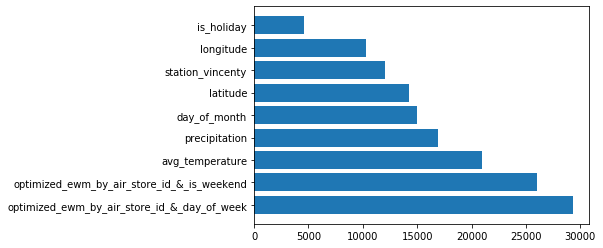

In [25]:
plt.barh(feature_importances.sort_values(0, ascending=False).index[:9], feature_importances.sort_values(0, ascending=False)[0][:9])
plt.savefig('importance.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [70]:
sub.to_csv('lgbm_{:.5f}_{:.5f}.csv'.format(val_mean, val_std), index=False)